#### Statistical forecasting with ARIMA

In [1]:
import sys
print(sys.executable)

c:\Users\basil\Anaconda\python.exe


In [2]:
import sys
sys.path.append('../modules')  # go up one folder, then into "modules"

import utils
utils.configure_plotly_template(showlegend=True)

In [3]:
import pandas as pd
df = pd.read_parquet('../statsmodel/AirPassengers_log.parquet').asfreq('ME')
df.columns = ["values"]
series = df["values"]
series

1949-01-31    4.718499
1949-02-28    4.770685
1949-03-31    4.882802
1949-04-30    4.859812
1949-05-31    4.795791
                ...   
1960-08-31    6.406880
1960-09-30    6.230481
1960-10-31    6.133398
1960-11-30    5.966147
1960-12-31    6.068426
Freq: ME, Name: values, Length: 144, dtype: float64

In [4]:
series.plot()

#### Model fit

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
series.index

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [7]:
p = 12
d = 1
q = 2 
model = ARIMA(endog=series, order=(p ,d, q))
model_fit =model.fit()

c:\Users\basil\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [8]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 values   No. Observations:                  144
Model:                ARIMA(12, 1, 2)   Log Likelihood                 246.772
Date:                Mon, 08 Sep 2025   AIC                           -463.543
Time:                        15:56:13   BIC                           -419.101
Sample:                    01-31-1949   HQIC                          -445.484
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1101      0.062      1.777      0.076      -0.011       0.232
ar.L2         -0.0752      0.066     -1.133      0.257      -0.205       0.055
ar.L3          0.0065      0.049      0.133      0.894      -0.090       0.103
ar.L4         -0.0635      0.051     -1.244      0.214      -0.164       0.037
ar.L5          0.0554      0.051      1.092      0.275      -0.044       0.155
ar.L6         -0.0502      0.045     -1.116      0.265      -0.138       0.038
ar.L7         -0.0072      0.050     -0.144      0.886      -0.105       0.090
ar.L8         -0.0973      0.051     -1.915      0.055      -0.197       0.002
ar.L9          0.0726      0.056      1.288      0.198      -0.038       0.183
ar.L10        -0.0750      0.055     -1.367      0.172      -0.182       0.033
ar.L11         0.0554      0.050      1.102      0.270      -0.043       0.154
ar.L12         0.8341      0.053     15.868      0.000       0.731       0.937
ma.L1         -0.4414      0.097     -4.532      0.000      -0.632      -0.251
ma.L2          0.0362      0.104      0.347      0.729      -0.168       0.241
sigma2         0.0015      0.000      7.927      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.26
Prob(Q):                              0.81   Prob(JB):                         0.20
Heteroskedasticity (H):               0.50   Skew:                             0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
forecast = model_fit.forecast(steps=48).to_frame(name='forecast')

In [10]:
h = series.to_frame(name='historical')

In [11]:
df_forecasts = pd.concat([forecast, h])
df_forecasts

,forecast,historical
1961-01-31,6.113957,NaN
1961-02-28,6.039105,NaN
1961-03-31,6.098054,NaN
1961-04-30,6.185912,NaN
1961-05-31,6.233113,NaN
...,...,...
1960-08-31,NaN,6.406880
1960-09-30,NaN,6.230481
1960-10-31,NaN,6.133398
1960-11-30,NaN,5.966147


In [12]:
df_forecasts.plot()

## Configuration

```python
p = 12
d = 1
q = 2

model = ARIMA(series, order=(p, d, q))
```

| Parameter | Name                     | What it does                                                                   |
| --------- | ------------------------ | ------------------------------------------------------------------------------ |
| p         | AR (AutoRegressive) part | How many *lagged values* of the time series are used (past observations).      |
| d         | I (Integrated) part      | How many times we difference the data to make it stationary.                   |
| q         | MA (Moving Average) part | How many lagged *forecast errors* (residuals) are used to model the next step. |

Why?

### q: Differencing

- ARIMA assumes that the series is stationary.
- Stationary series have constant mean and variance over time.

In [13]:
series_diff = series.diff()

In [14]:
df['series_diff'] = series_diff

In [15]:
df = df.dropna()

In [16]:
df

,values,series_diff
1949-02-28,4.770685,0.052186
1949-03-31,4.882802,0.112117
1949-04-30,4.859812,-0.022990
1949-05-31,4.795791,-0.064022
1949-06-30,4.905275,0.109484
...,...,...
1960-08-31,6.406880,-0.026060
1960-09-30,6.230481,-0.176399
1960-10-31,6.133398,-0.097083
1960-11-30,5.966147,-0.167251


In [17]:
fig = df.plot(facet_col = 'variable')
fig.update_yaxes(matches=None)

In [18]:
from statsmodels.tsa.stattools import adfuller
adfuller(x=df['values'], maxlag=12)

(np.float64(-1.8549921957299533),
 np.float64(0.35352116777130144),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-440.29474279152817))

In [19]:
adfuller(x=df['series_diff'],maxlag=12)

(np.float64(-3.0530320109154627),
 np.float64(0.030229987648696697),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-448.718127711991))

### `p`: PACF – Partial Autocorrelation Function

* PACF is the **partial autocorrelation** of the series.
* It measures the correlation of the series with its past values, **controlling for the influence of intermediate lags**.
* Use PACF to determine the **AR (AutoRegressive)** component **`p`** in ARIMA.

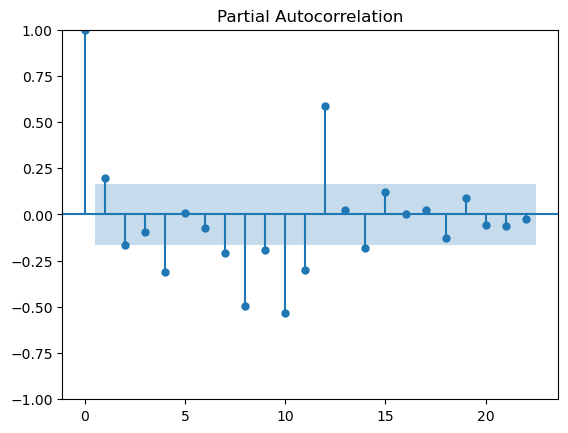

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['series_diff']);

### `q`: ACF – Autocorrelation Function

* ACF is the **autocorrelation** of the series.
* It measures the correlation of the series with its past values **without controlling** for intermediate lags.
* Use ACF to determine the **MA (Moving Average)** component **`q`** in ARIMA.

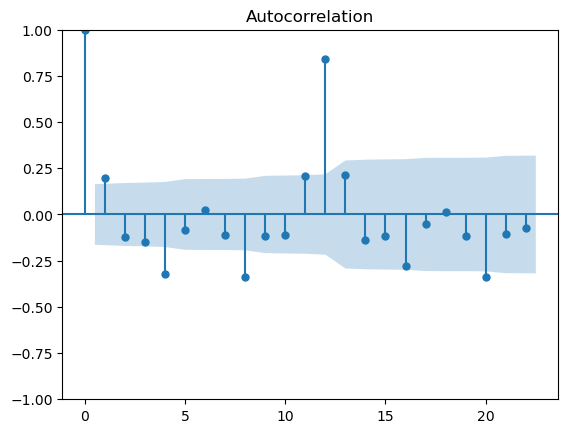

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['series_diff']);

#### Variation Playground

In [24]:
df = df[['values']]
df_forecast = utils.get_model_forecast(df, 'values', order=(12,1,1))
df_forecast = utils.get_model_forecast(df_forecast, 'values', order=(12,1,0))
df_forecast

c:\Users\basil\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\basil\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,values,"ARIMA(12,1,1)","ARIMA(12,1,0)"
1949-02-28,4.770685,0.000000,0.000000
1949-03-31,4.882802,4.770685,4.770685
1949-04-30,4.859812,4.898375,4.908317
1949-05-31,4.795791,4.836398,4.834832
1949-06-30,4.905275,4.786417,4.775266
...,...,...,...
1964-08-31,NaN,6.522971,6.385198
1964-09-30,NaN,6.412069,6.277132
1964-10-31,NaN,6.313109,6.189034
1964-11-30,NaN,6.194777,6.085556


In [25]:
df_forecast.plot()

#### Diagnostic and assuptions

In [27]:
start, end = series.index[[0, -1]]
start, end

(Timestamp('1949-01-31 00:00:00'), Timestamp('1960-12-31 00:00:00'))

In [29]:
predicted = model_fit.predict(start=start, end=end)
predicted

1949-01-31    0.000000
1949-02-28    4.718499
1949-03-31    4.788808
1949-04-30    4.920503
1949-05-31    4.840283
                ...   
1960-08-31    6.432076
1960-09-30    6.255677
1960-10-31    6.098229
1960-11-30    6.009769
1960-12-31    6.073759
Freq: ME, Name: predicted_mean, Length: 144, dtype: float64

In [41]:
residual = model_fit.resid[1:]


#### Autocorrelation

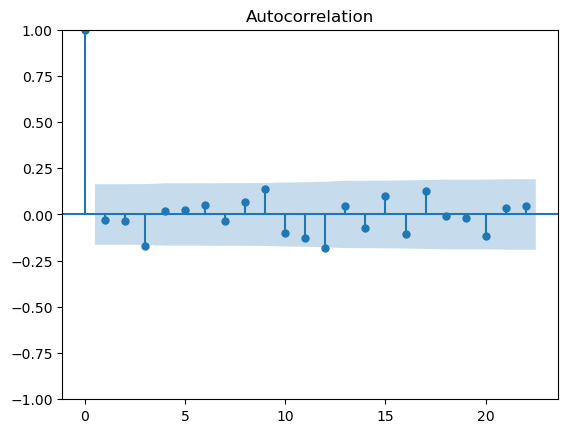

In [42]:
plot_acf(residual);

##### Test

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ib = acorr_ljungbox(residual, lags=[10,20,30], return_df=True)
print("Ljung-Box Test:\n", ib)

Ljung-Box Test:
       lb_stat  lb_pvalue
10  10.364725   0.409098
20  27.766247   0.115049
30  38.854558   0.129021


#### Normality

##### Plot

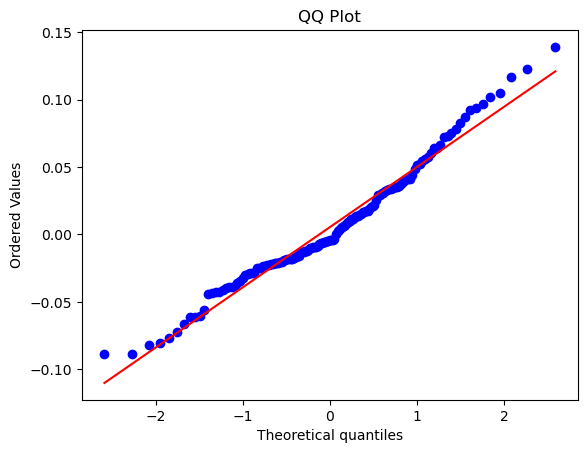

In [51]:
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
stats.probplot(residual, dist='norm',plot=ax)
ax.set_title("QQ Plot")
plt.show()

In [52]:
from scipy.stats import jarque_bera
jb = jarque_bera(residual)
print(
    f"Jarque-Bera (Good): Statistic={jb.statistic:.3f}, p-value={jb.pvalue:.3f}"
)

Jarque-Bera (Good): Statistic=6.455, p-value=0.040


#### Homoscendasticity

##### Plot

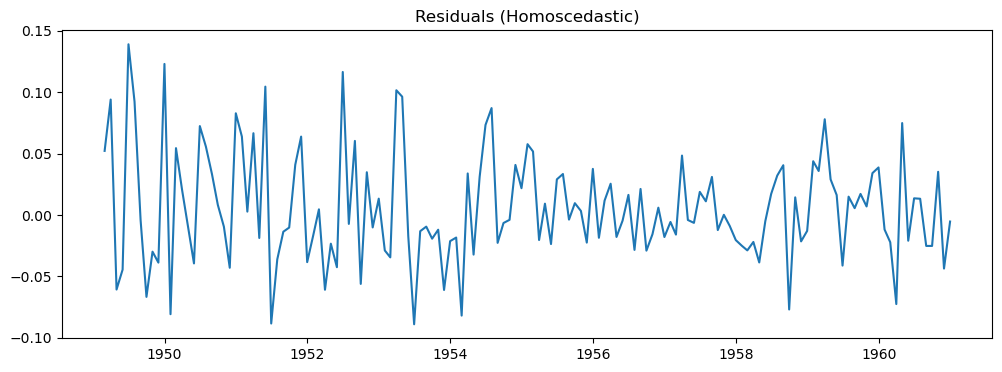

In [49]:

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(residual)
ax.set_title("Residuals (Homoscedastic)")
plt.show()

##### Test

In [50]:
from statsmodels.stats.diagnostic import het_arch
het_arch(residual)


(np.float64(26.54253990586371),
 np.float64(0.003075105829897657),
 3.041768858332675,
 0.0017890254729128914)